# Homework 1

![image.png](attachment:image.png)

## Dataset
First download the training and validation data. You can just download it manually (by pasting the https://www.dropbox.com... link in your browser), or using the terminal commands `curl` (`wget` is an alternative command):

In [72]:
! curl -L --output galaxy_train.h5 "https://www.dropbox.com/scl/fi/31l0ytuz4ze921uzg521o/galaxy_train.h5?rlkey=5ir4jo1d6xjykqkncj1sawmh0&dl=1"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     27      0 --:--:-- --:--:-- --:--:--    27
100   496    0   496    0     0    238      0 --:--:--  0:00:02 --:--:--  2214
100  443M  100  443M    0     0  16.3M      0  0:00:27  0:00:27 --:--:-- 19.6M


In [73]:
! curl -L --output galaxy_val.h5 "https://www.dropbox.com/scl/fi/psdf9wsxwpv2ayuel5zvt/galaxy_val.h5?rlkey=lmhnl6670pag5nhejhwlt7pze&dl=1"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     32      0 --:--:-- --:--:-- --:--:--    32
100   496    0   496    0     0    270      0 --:--:--  0:00:01 --:--:--  7515
100 55.4M  100 55.4M    0     0  8631k      0  0:00:06  0:00:06 --:--:-- 14.8M


In [74]:
path_to_training_data = 'galaxy_train.h5'
path_to_validation_data = 'galaxy_val.h5'

### activate autoreload so any changes you make to dataloader.py, model.py are automatically imported

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## now, write a custom dataloader for the dataset



In [76]:


import h5py
import numpy as np
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data_path):
        self.data_path = data_path
        with h5py.File(self.data_path, 'r') as hf:
            self.images = hf['images'][:]
            self.labels = hf['ans'][:]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return image, label

# Example usage
# train_dataset = CustomDataset(path_to_training_data)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)



In [77]:
#from dataset import CustomDataset

## you should get something that works like this:

In [78]:
training_ds = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [79]:
training_ds = CustomDataset(path_to_training_data)
validation_ds = CustomDataset(path_to_validation_data)

In [80]:
some_random_idx = 12
training_ds[some_random_idx]

(array([[36.075   , 31.815   , 31.68375 , ..., 27.685   , 25.508125,
         26.5375  ],
        [28.013125, 32.405625, 30.574375, ..., 25.92125 , 32.02125 ,
         30.770625],
        [26.716875, 30.5925  , 31.745625, ..., 27.549375, 27.39625 ,
         35.11375 ],
        ...,
        [35.73375 , 30.93125 , 30.505   , ..., 24.63    , 24.44625 ,
         31.91    ],
        [28.3075  , 35.115625, 37.4175  , ..., 30.495   , 26.405625,
         36.624375],
        [31.245625, 29.33    , 32.808125, ..., 33.478125, 31.3675  ,
         36.125625]]),
 np.uint8(7))

## now create the data loaders, and set the batch size.
remember to shuffle the training dataset

In [81]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_ds,batch_size=300,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=300)

In [82]:
for x,y in training_dataloader:
    print(x.shape,y.shape)
    break

torch.Size([300, 64, 64]) torch.Size([300])


In [83]:
len(training_ds)

14188

In [84]:
print(y)

tensor([6, 1, 6, 0, 3, 5, 9, 6, 3, 6, 2, 7, 9, 5, 5, 1, 9, 6, 2, 5, 7, 1, 9, 4,
        3, 3, 7, 9, 3, 0, 5, 3, 7, 3, 3, 8, 2, 5, 8, 2, 9, 2, 6, 2, 7, 6, 8, 8,
        2, 7, 2, 2, 1, 0, 6, 0, 2, 2, 5, 7, 9, 2, 7, 9, 1, 0, 6, 1, 1, 9, 6, 3,
        7, 0, 7, 3, 5, 8, 2, 7, 3, 5, 1, 5, 7, 9, 7, 6, 3, 3, 6, 1, 9, 5, 8, 4,
        5, 2, 9, 3, 6, 9, 3, 7, 5, 7, 7, 6, 7, 2, 1, 1, 7, 2, 8, 6, 7, 1, 7, 3,
        3, 6, 7, 7, 0, 8, 8, 9, 7, 9, 3, 8, 9, 8, 2, 3, 5, 0, 7, 3, 3, 6, 7, 1,
        3, 1, 7, 7, 1, 2, 9, 8, 5, 5, 2, 5, 7, 8, 7, 3, 2, 7, 2, 8, 8, 3, 3, 3,
        7, 7, 2, 7, 1, 3, 8, 3, 9, 7, 7, 2, 5, 8, 6, 3, 3, 6, 1, 2, 3, 6, 8, 7,
        1, 3, 6, 5, 6, 1, 0, 0, 2, 3, 2, 7, 0, 6, 9, 3, 5, 1, 7, 2, 7, 2, 3, 7,
        2, 5, 0, 9, 7, 7, 3, 7, 9, 6, 9, 5, 6, 3, 3, 0, 7, 9, 3, 5, 2, 0, 7, 2,
        2, 7, 7, 1, 6, 5, 1, 3, 5, 3, 7, 6, 9, 2, 6, 3, 9, 9, 5, 3, 9, 1, 5, 2,
        6, 2, 2, 9, 7, 2, 3, 1, 7, 0, 5, 8, 5, 7, 3, 2, 7, 2, 7, 7, 3, 3, 5, 9,
        5, 7, 7, 8, 5, 5, 0, 3, 1, 8, 2,

## lets plot some examples from each class

this should work if your dataloader is implemented properly

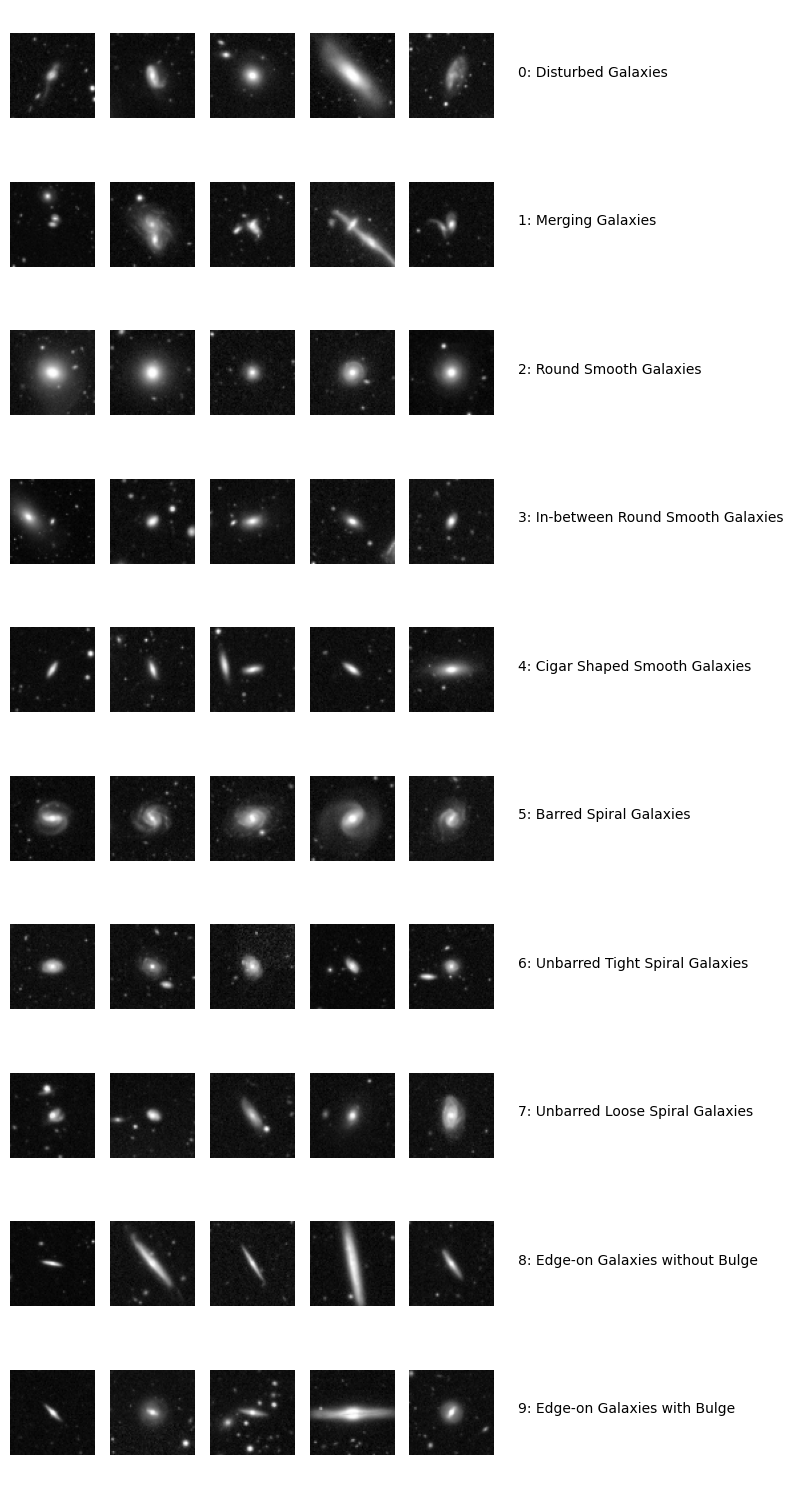

In [85]:
import numpy as np
import matplotlib.pyplot as plt

labels = [
    'Disturbed Galaxies',
    'Merging Galaxies',
    'Round Smooth Galaxies',
    'In-between Round Smooth Galaxies',
    'Cigar Shaped Smooth Galaxies',
    'Barred Spiral Galaxies',
    'Unbarred Tight Spiral Galaxies',
    'Unbarred Loose Spiral Galaxies',
    'Edge-on Galaxies without Bulge',
    'Edge-on Galaxies with Bulge'
    ]

fig,ax = plt.subplots(10,6,figsize=(8,15))


for class_i in range(10):
    idxs = np.where( training_ds.labels == class_i )[0]
    idxs = np.random.permutation(idxs)
    for plot_i in range(np.min([5,len(idxs)])):

        ax[class_i][plot_i].imshow(training_ds[idxs[plot_i]][0].reshape(64,64),cmap='gray')
        ax[class_i][plot_i].set_axis_off()

    #Draw the label
    ax[class_i][5].text(0.1,0.5,f'{class_i}: {labels[class_i]}')
    ax[class_i][5].set_axis_off()

plt.tight_layout()
plt.show()

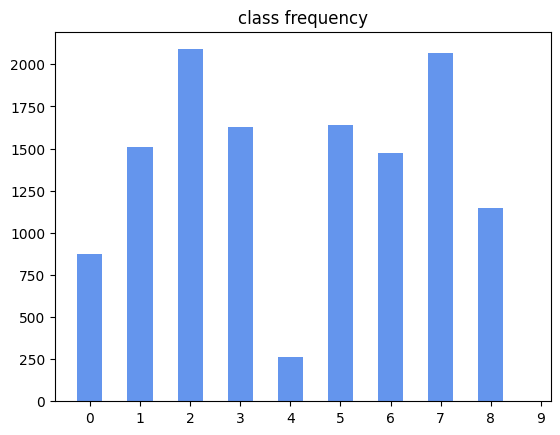

In [86]:
plt.hist(np.array(training_ds.labels), bins=np.linspace(0, 9, 19) - 0.25, color='cornflowerblue', ec='k')
plt.xticks(np.arange(10))
plt.title('class frequency')
plt.show()

In [87]:
# plt.hist(training_ds.labels.data.numpy(),bins=np.linspace(0,9,19)-0.25,color='cornflowerblue',ec='k')
# plt.xticks(np.arange(10))
# plt.title('class frequency')
# plt.show()

AttributeError: 'memoryview' object has no attribute 'numpy'

# Now lets build the neural network

its a classifier - it takes as input 64*64 numbers, and outputs 10 numbers

In [89]:


import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(64 * 64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 64 * 64).float() # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # No activation on the output layer for classification
        return x


In [90]:
#from model import Net

In [91]:
net = Net()

## check your model takes the input and returns the right shape for the output.
should be (Batch size, 10) for the 10 classes

In [92]:
for x,y in training_dataloader:
    print(x.shape,net(x).shape,y.shape)
    break

torch.Size([300, 64, 64]) torch.Size([300, 10]) torch.Size([300])


## the training:


The network will be trained to predict a high value for output nodes that correspond to probable classes for the given example. The correct answer is, of course, only a single class. To compare the predicted values for each class and the correct class, we use a very popular loss function called CrossEntropy. It first transforms the network prediction into a set of probabilities for each class and then calculates a distance between predicted and target distributions using logarithmic values of the probabilities for each class.

To learn more check out these descriptions:
- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [94]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0

    loss = 0

    if torch.cuda.is_available():
        net.cuda()
    net.eval()

    n_batches = 0
    with torch.no_grad():
        for x,y in dataloader:
            n_batches+=1

            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            pred = net(x)

            # print(pred[0])

            loss+= loss_func(pred,y).item()

            pred = torch.argmax(pred,dim=1)

            correct+=len(torch.where(pred==y)[0])
            total+=len(y)

    loss = loss/n_batches
    return correct/total, loss

In [95]:
compute_accuracy_and_loss(training_dataloader,net)

(0.07076402593741189, 7.069861084222794)

In [96]:
compute_accuracy_and_loss(valid_dataloader,net)

(0.06937394247038917, 7.152708450953166)

### A basic training loop

In [97]:
if torch.cuda.is_available():
    net.cuda()

In [98]:
from tqdm.notebook import tqdm

n_epochs = 80
best_loss = 1e9
best_acc = 0

training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

for epoch in pbar:

    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
                             ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))

    net.train() # put the net into "training mode"
    for x,y in training_dataloader:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()

        optimizer.zero_grad()
        pred = net(x)
        loss = loss_func(pred,y)
        loss.backward()
        optimizer.step()

    net.eval() #put the net into evaluation mode

    #evaluate accuracy and loss after this step and save for later
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)

    training_loss_vs_epoch.append( train_loss)
    training_acc_vs_epoch.append( train_acc )
    validation_loss_vs_epoch.append(valid_loss)
    validation_acc_vs_epoch.append(valid_acc)

    #save the model if the validation loss went lower than the previous best
    if valid_loss < best_loss:
        torch.save(net.state_dict(), 'trained_model.pt')
        best_loss = valid_loss
        best_acc = valid_acc

print('Best validation loss: ',best_loss)
print('Best validation accuracy: ',best_acc)


  0%|          | 0/80 [00:00<?, ?it/s]

Best validation loss:  1.4835703770319622
Best validation accuracy:  0.48336153412295546


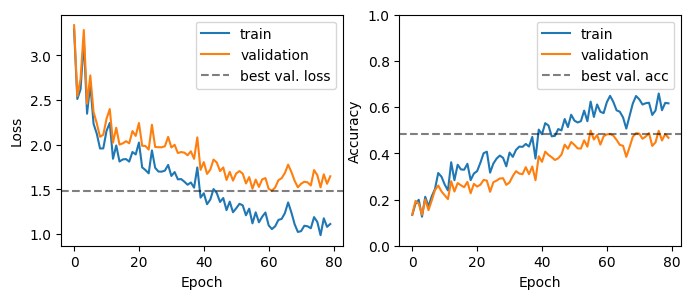

In [99]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='train')
ax[0].plot(validation_loss_vs_epoch,label='validation')
ax[0].axhline(best_loss,c='k',ls='--',label='best val. loss', alpha=0.5)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

ax[1].plot(training_acc_vs_epoch, label='train')
ax[1].plot(validation_acc_vs_epoch, label='validation')
ax[1].axhline(best_acc,c='k',ls='--',label='best val. acc', alpha=0.5)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0,1)

ax[0].legend()
ax[1].legend()

plt.show()